In [3]:
import pandas as pd
import numpy as np



In [4]:
# reading the dataset
# The dataset is a CSV file containing SMS messages labeled as spam or ham
df = pd.read_csv("spam.csv", encoding="iso-8859-1")

df.shape

(5572, 5)

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5166,ham,Y she dun believe leh? I tot i told her it's t...,NaN,NaN,NaN
2408,ham,Dear where you will be when i reach there,NaN,NaN,NaN
2114,spam,Sunshine Hols. To claim ur med holiday send a ...,NaN,NaN,NaN
2812,ham,Enjoy the showers of possessiveness poured on ...,NaN,NaN,NaN
1931,ham,What pa tell me.. I went to bath:-),NaN,NaN,NaN


## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df.rename(columns={"v1": "label", "v2": "message"}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
# Encoding the labels (spam and ham) into numerical values
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"])

df.sample(15)


,label,message
777,0,\Hi its Kate it was lovely to see you tonight ...
1022,0,We still on for tonight?
5405,0,So how many days since then?
348,1,Fancy a shag? I do.Interested? sextextuk.com t...
3423,1,Am new 2 club & dont fink we met yet Will B gr...
2826,0,"Oh right, ok. I'll make sure that i do loads o..."
1050,0,Are you available for soiree on June 3rd?
1550,0,He says hi and to get your ass back to south t...
1165,0,"Haha yeah I see that now, be there in a sec"
5071,1,WIN a å£200 Shopping spree every WEEK Starting...


In [9]:
# check for null values
df.isnull().sum()

label      0
message    0
dtype: int64

In [10]:
# checking for duplicates
df.duplicated().sum()




np.int64(403)

In [11]:
# removing duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.shape

(5169, 2)

## exploratory data analysis

In [12]:
# value counts of the labels
df["label"].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Spam and Ham Messages')

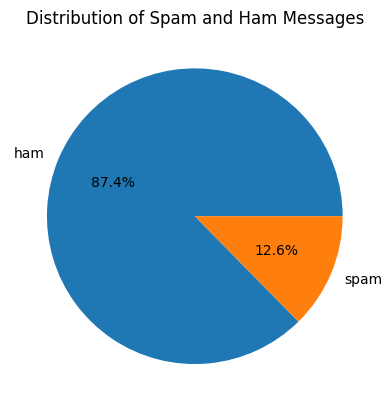

In [13]:
# pie chart for the distribution of spam and ham messages
import matplotlib.pyplot as plt
plt.pie(df["label"].value_counts(), labels=["ham", "spam"], autopct="%1.1f%%")
plt.title("Distribution of Spam and Ham Messages")

In [14]:
import nltk  ## natural language toolkit 


In [15]:
nltk.download("punkt") ## downloading the punkt tokenizer for tokenizing the messages
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /home/no0ne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/no0ne/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
df["num_characters"] = df["message"].apply(len)  ## counting the number of characters in each message
df.head( )

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# number of words in each message
df["word_count"] = [len(nltk.word_tokenize(text)) for text in df["message"]]
df.head()


,label,message,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
# sentence count
df["num_sentences"] = [len(nltk.sent_tokenize(text)) for text in df["message"]]
df.head()

,label,message,num_characters,word_count,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
# describe ham
df[df["label"] == 0][["num_characters", "word_count", "num_sentences"]].describe()

,num_characters,word_count,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# describe spam
df[df["label"] == 1][["num_characters", "word_count", "num_sentences"]].describe()

,num_characters,word_count,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

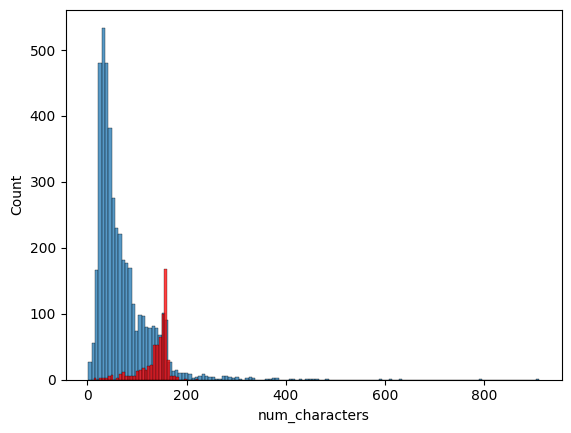

In [21]:
# plotting histogram for ham and spam messages
import seaborn as sns
sns.histplot(df[df["label"] == 0]["num_characters"])
sns.histplot(df[df["label"] == 1]["num_characters"] , color="red")
# plt.title("Distribution of Characters in Ham and Spam Messages")
# plt.xlabel("Number of Characters")
# plt.ylabel("Frequency")
# plt.legend(["Ham", "Spam"])
# plt.show()


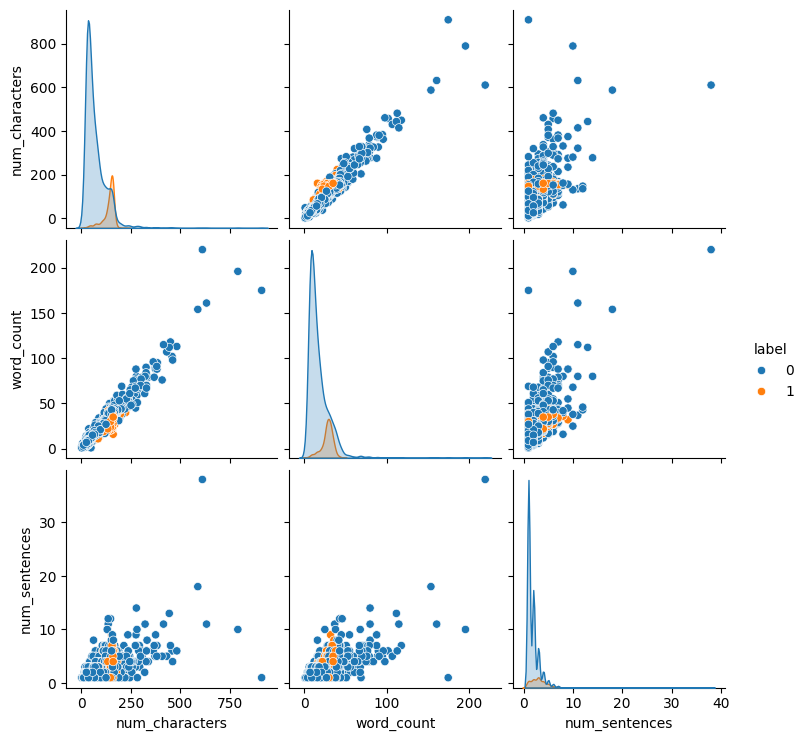

In [23]:
sns.pairplot(df, hue="label", diag_kind="kde")

## Data Preprocessing

In [35]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
# downloading the stopwords
nltk.download("stopwords")  # downloading the stopwords
# removing stopwords and punctuation
def transform_text(text):
    text = text.lower()  # converting to lowercase
    text = nltk.word_tokenize(text)  # tokenizing the text
    text = [word for word in text if word.isalnum()]  # removing special characters
    text = [word for word in text if word not in stopwords.words("english") and word not in punctuation] 
    ps = PorterStemmer()  # creating an object of the PorterStemmer class
    text = [ps.stem(word) for word in text]  # stemming the words
    return " ".join(text)  # joining the words back into a string
# df["message"] = df["message"].apply(tranform_text)  # applying the function to the message column

[nltk_data] Downloading package stopwords to /home/no0ne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# transforming every message in the dataset
df["transformed_text"] = [transform_text(text) for text in df["message"]]
df.head()

,label,message,num_characters,word_count,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
# creatting a word cloud for important word in ham and spams 
from wordcloud import WordCloud
wc = WordCloud(width=800, height=800, background_color="white", min_font_size=10)

# for spam
spam_wc = wc.generate(" ".join(df[df["label"] == 1]["transformed_text"])) 

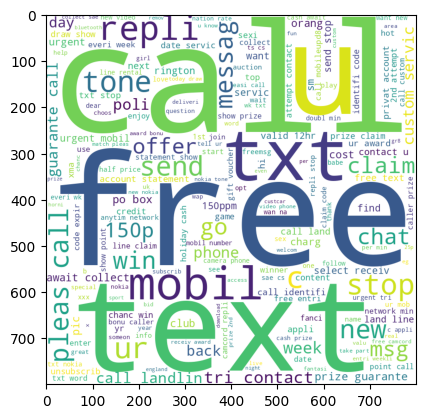

In [ ]:
plt.imshow(spam_wc)

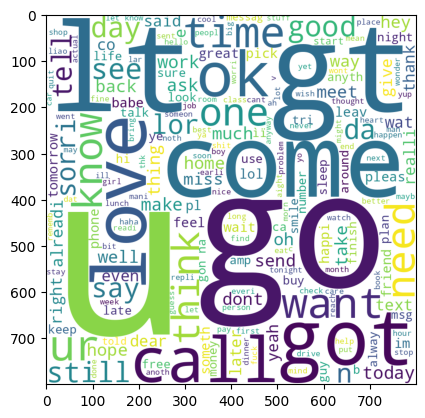

In [53]:
# for ham 
ham_wc = wc.generate(" ".join(df[df["label"] == 0]["transformed_text"])) 
plt.imshow(ham_wc)

In [ ]:
# getting the top 30 words in spam and ham messages
# for spam 
spam_corpus = []
for message in df[df["label"] == 1]["transformed_text"].to_list():
    for word in message.split():
        spam_corpus.append(word)

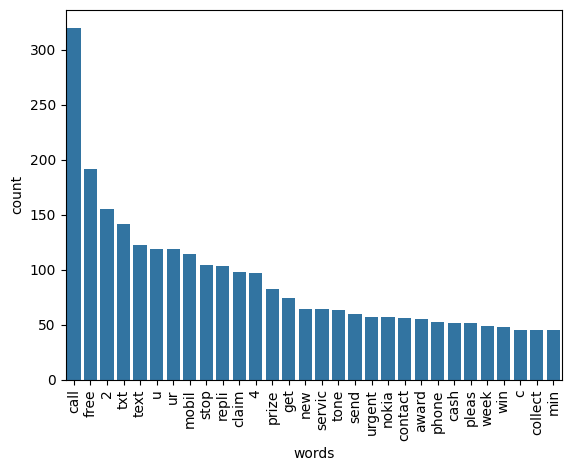

In [74]:
from collections import Counter
Counter(spam_corpus) ## this will give the count of each word in spam messages
# getting the top 30 words in spam messages
commonDf = pd.DataFrame(Counter(spam_corpus).most_common(30))
commonDf.columns = ["words", "count"]
# print(commonDf)
sns.barplot(x = "words", y= "count", data=commonDf)
plt.xticks(rotation="vertical")
plt.show()



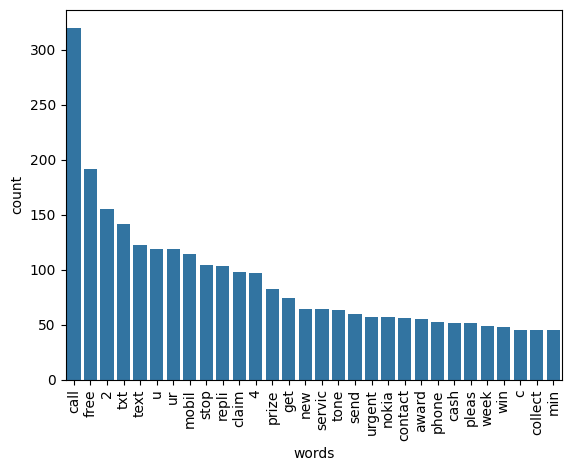

In [ ]:
# for ham
ham_corpus = []
for message in df[df["label"] == 0]["transformed_text"].to_list():
    for word in message.split():
        ham_corpus.append(word)
Counter(ham_corpus) ## this will give the count of each word in ham messages
commonHamDf = pd.DataFrame(Counter(ham_corpus).most_common(30))
commonHamDf.columns = ["words", "count"]
# print(commonDf)
sns.barplot(x = "words", y= "count", data=commonHamDf)
plt.xticks(rotation="vertical")
plt.show()